In [97]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [98]:
# reading full data
pd.read_csv("Data/bank-full.csv")

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."
...,...
45206,"51;""technician"";""married"";""tertiary"";""no"";825;..."
45207,"71;""retired"";""divorced"";""primary"";""no"";1729;""n..."
45208,"72;""retired"";""married"";""secondary"";""no"";5715;""..."
45209,"57;""blue-collar"";""married"";""secondary"";""no"";66..."


In [99]:
law = pd.read_csv("Data/bank-full.csv", sep=';')
law.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [100]:
law.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [101]:
law.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [102]:
law.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Exploratory Data Analysis

In [103]:
law["y"].value_counts(normalize = True)

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

Changing month value into numerical values

In [104]:
month_to_nv = {
    "jan": 1,
    "feb": 2,
    "mar": 3,
    "apr": 4,
    "may": 5,
    "jun": 6,
    "jul": 7,
    "aug": 8,
    "sep": 9,
    "oct": 10,
    "nov": 11,
    "dec": 12
}

law["month"] = law["month"].apply(lambda x: month_to_nv[x])

In [105]:
# Changing Yes and No to 1 and 0 (Where Yes is 1 and No is 0)
yes_no_columns = law.columns[law.isin(['yes', 'no']).any()]
law[yes_no_columns] = law[yes_no_columns].applymap(lambda x: 1 if x == 'yes' else (0 if x == 'no' else x))

C:\Users\Law\AppData\Local\Temp\ipykernel_18416\3200807301.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  law[yes_no_columns] = law[yes_no_columns].applymap(lambda x: 1 if x == 'yes' else (0 if x == 'no' else x))


In [106]:
law.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,5,198,1,-1,0,unknown,0


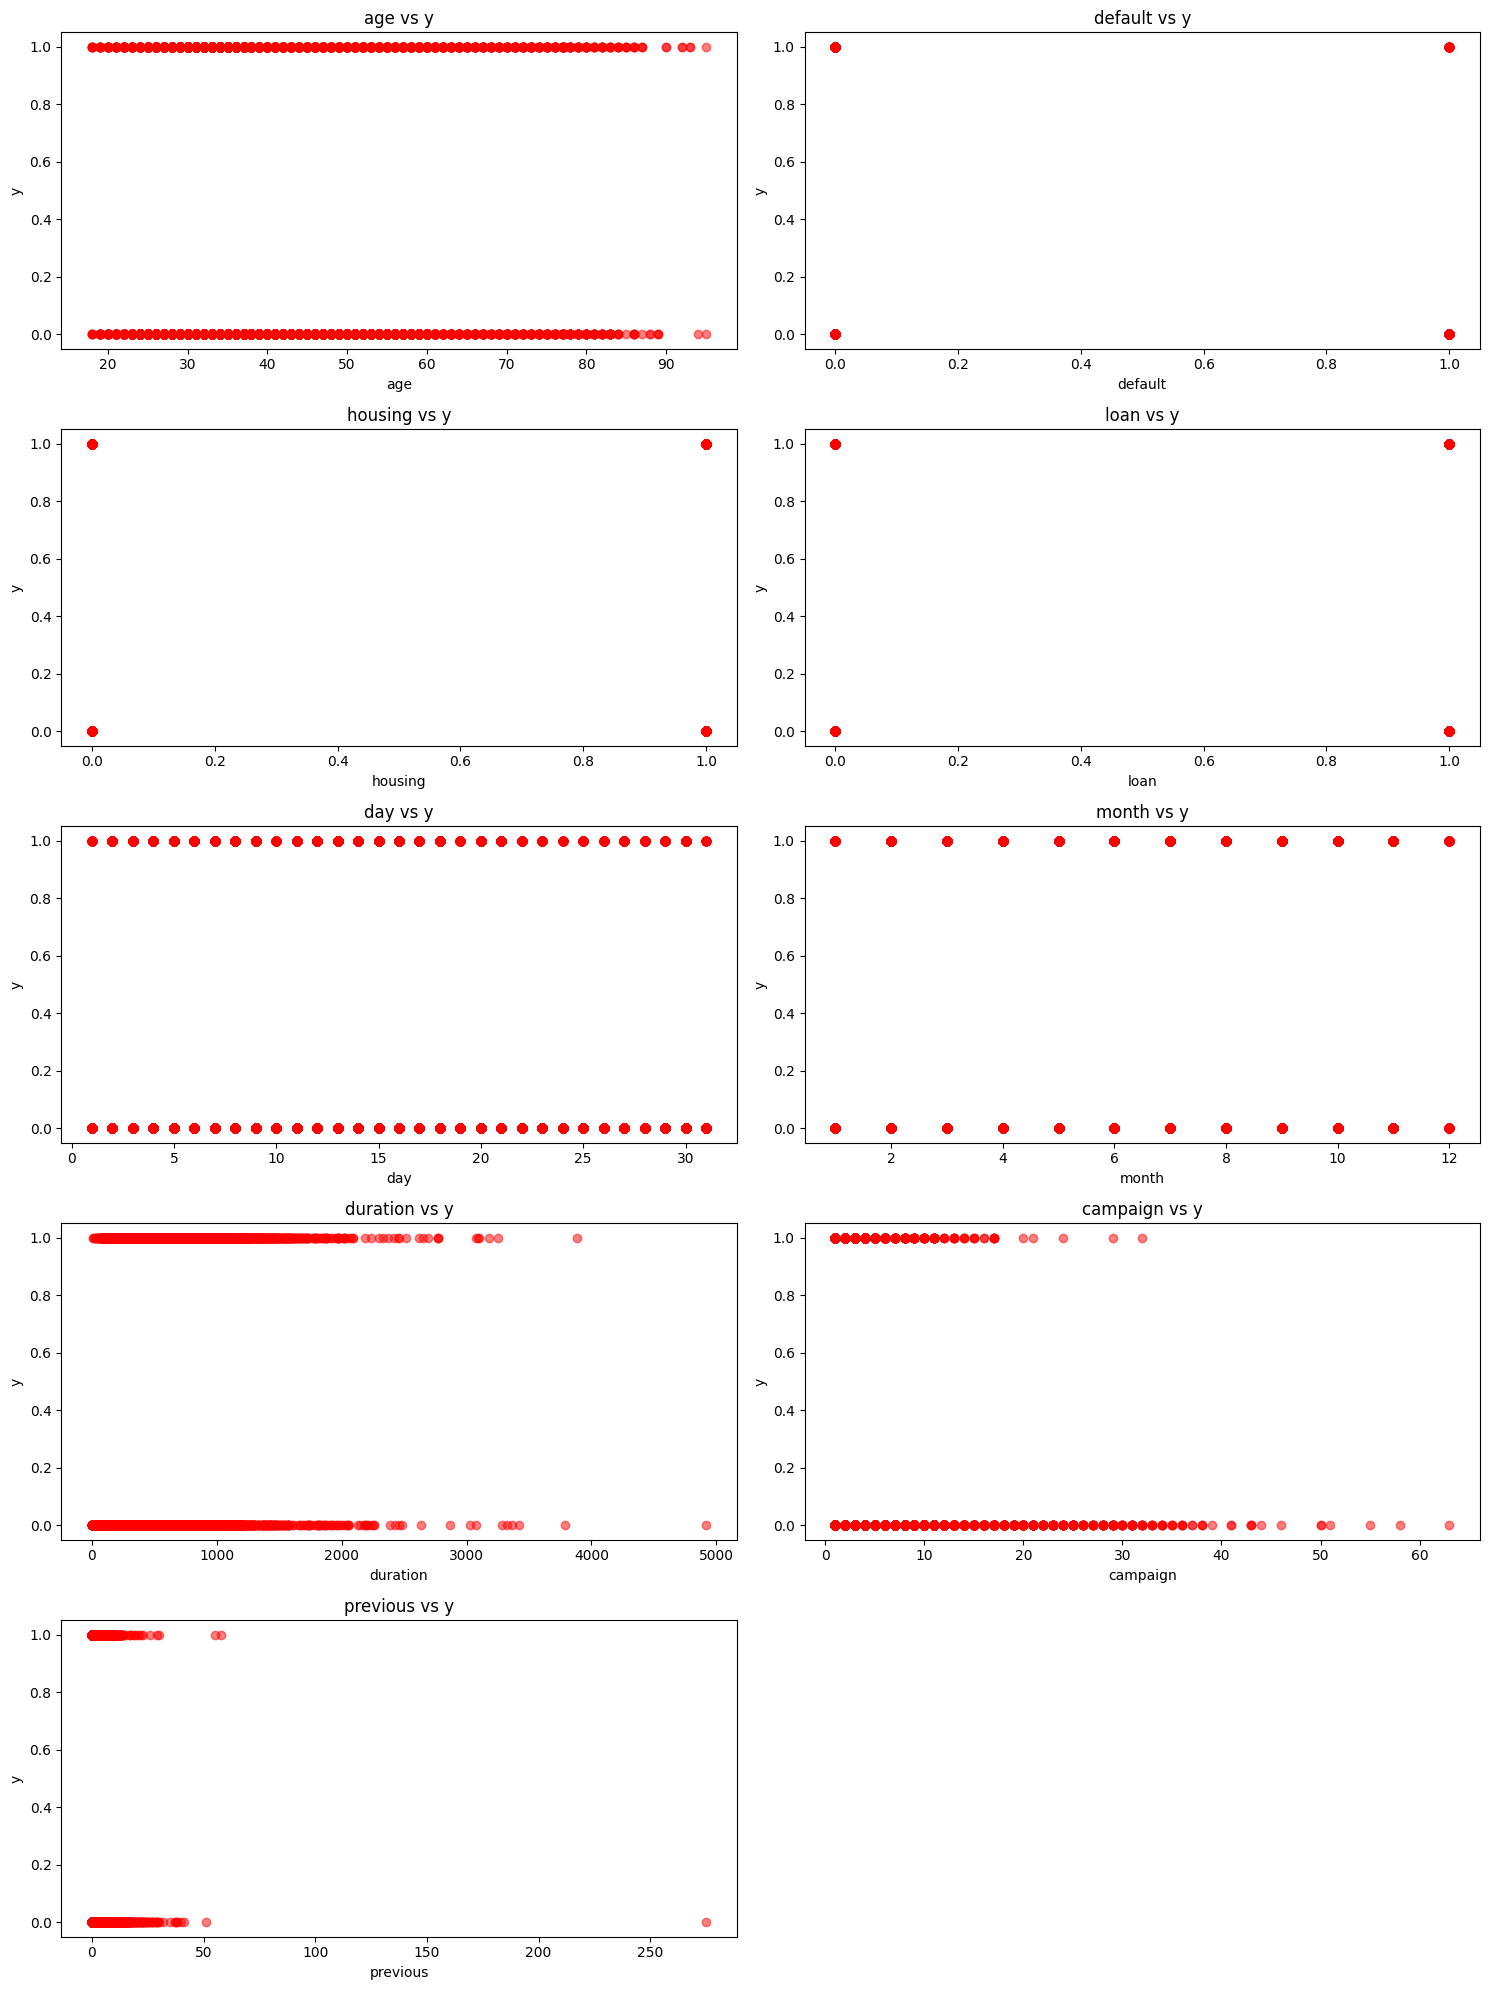

In [107]:
P_values = ['age', 'default', 'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'previous']
plt.figure(figsize=(15, 20))
for i, P_values in enumerate(P_values):
    plt.subplot(5, 2, i + 1)
    if law[P_values].dtype == 'object':
        sns.stripplot(x = P_values, y='y', data = law, jitter=True, alpha=0.6)
    else:
        plt.scatter(law[P_values], law['y'], alpha = 0.5, color = "red")
        plt.xlabel(P_values)
        plt.ylabel('y')
        plt.title(f'{P_values} vs y')

plt.tight_layout()
plt.show()

Converting Columns into Binary

In [86]:
for column in law.select_dtypes(include = "object").columns:
    if len(law[column].unique()) == 2 and column != 'month':
        law[column] = law[column].apply(lambda x: 1 if x == "yes" else 0)

Encoding Columns

In [87]:
obj_columns = law.select_dtypes(include = "object").columns
law = pd.get_dummies(law, columns = obj_columns)
law[law.select_dtypes(include = "bool").columns] = law[law.select_dtypes(include = "bool").columns].astype(int)

Feature Extraction (Numerical and Categorical Extraction)

In [88]:
numerical_feature = []
categorical_feature = []

for column in law.columns:
    if column == "Target":
        continue
    elif len(law[column].unique()) <= 10:
        categorical_feature.append(column)
    else:
        numerical_feature.append(column)

Cleraing Outliers

In [89]:
no_o_law = law.copy()
for column in numerical_feature:
    IQR = no_o_law[column].quantile(0.75) - no_o_law[column].quantile(0.25)
    lower_bound = no_o_law[column].quantile(0.25) - 1.5 * IQR
    upper_bound = no_o_law[column].quantile(0.75) + 1.5 * IQR
    no_o_law = no_o_law[(no_o_law[column] >= lower_bound) & (no_o_law[column] <= upper_bound)]

c:\Users\Law\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Law\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


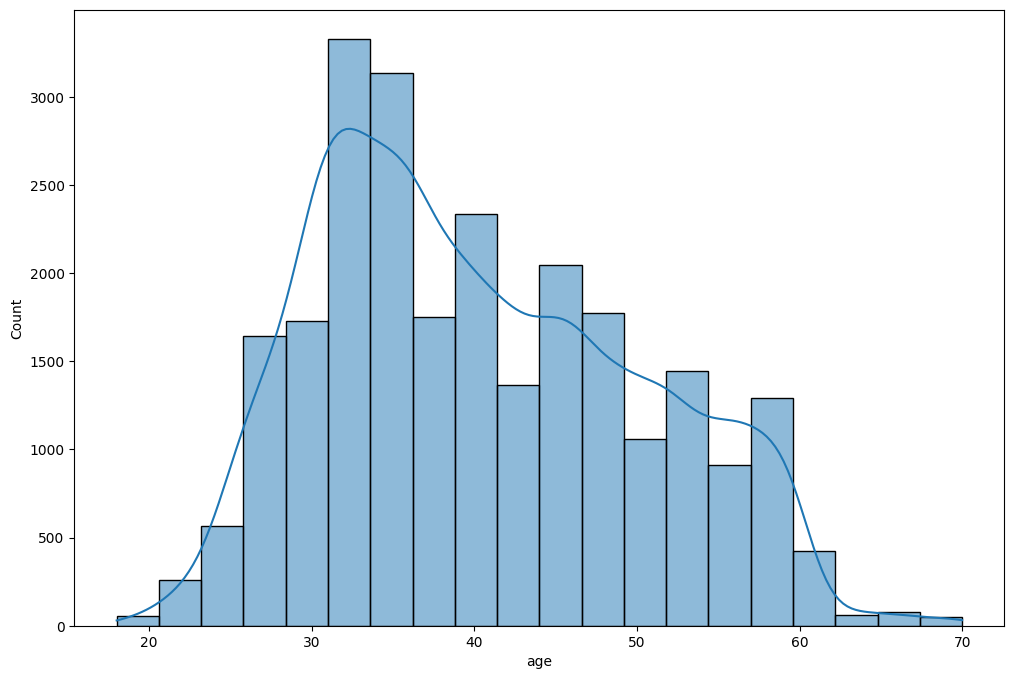

In [90]:
plt.figure(figsize = (12, 8))
sns.histplot(data = no_o_law["age"], kde=True, bins=20)

plt.show()

In [91]:
law_m = no_o_law[numerical_feature + ["y"]] \
    .melt(id_vars = "y", value_vars = numerical_feature,
         var_name = "feature_name", value_name = "feature_value")

In [92]:
law.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,1,0,0,1,0,0,0,1


c:\Users\Law\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Law\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Law\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Law\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

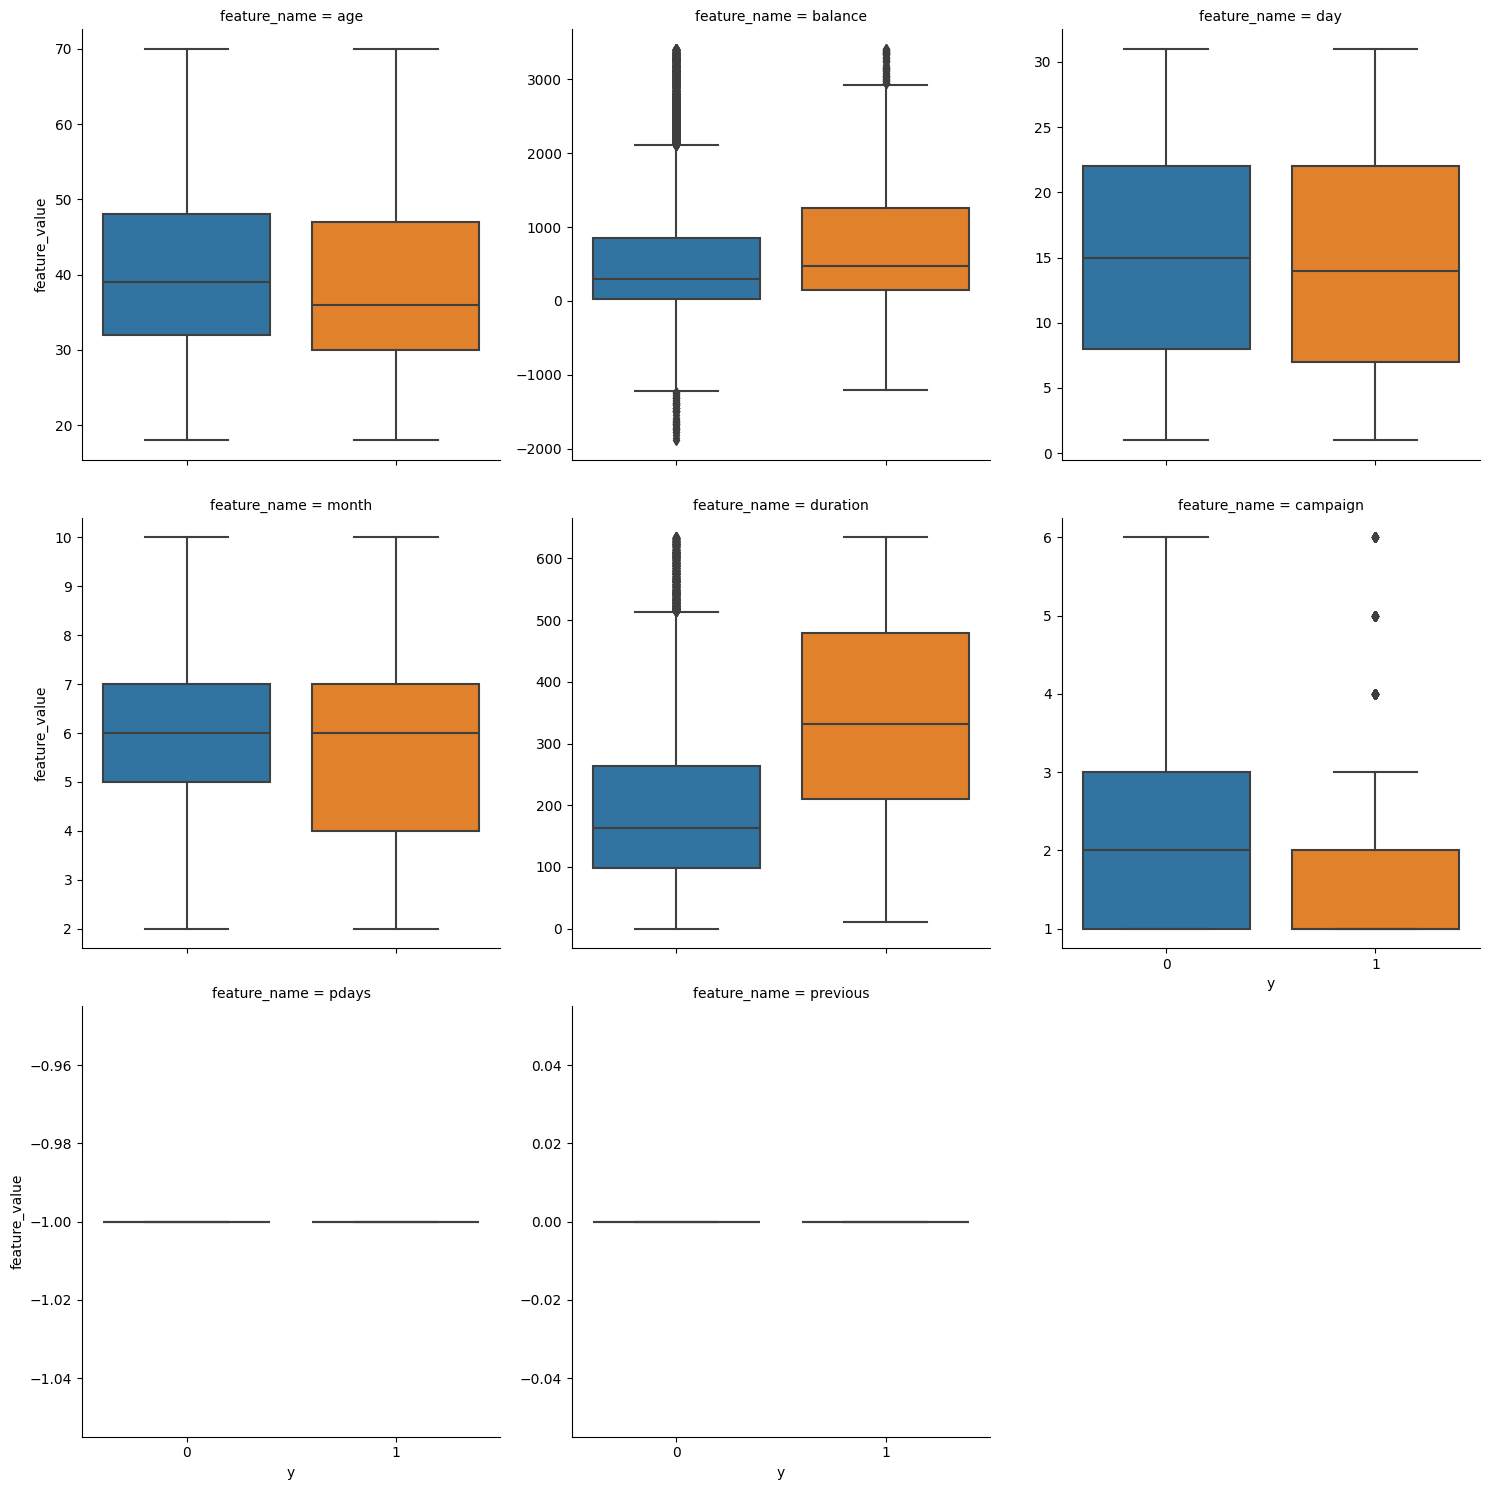

In [93]:
sns.catplot(kind='box', data = law_m,
           x='y', y='feature_value',
           col='feature_name', col_wrap=3, sharey=False)

plt.show()

In [109]:
X_train, X_test, y_train, y_test = train_test_split(law[['age', 'default', 'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'previous']], law.y, test_size = 0.1)

In [110]:
len(X_train)

40689

In [111]:
len(X_test)

4522

In [88]:
X_test.head()

,age,default,housing,loan,day,month,duration,campaign,previous
44351,39,0,0,0,30,7,240,3,0
16162,32,0,0,1,22,7,62,3,0
33601,32,0,1,1,20,4,72,2,0
26824,40,0,1,1,20,11,194,4,8
10836,46,0,0,0,17,6,71,1,0


In [112]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\Law\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [113]:
model.predict(X_test,)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [114]:
y_test

22306    0
22909    1
11576    0
16486    0
31989    0
        ..
15415    1
21722    0
13415    0
11484    0
3093     0
Name: y, Length: 4522, dtype: int64

In [115]:
model.score(X_test, y_test)

0.8810260946483857

In [116]:

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("\n", Counter(y_test), "\n", Counter(y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3979
           1       0.51      0.17      0.25       543

    accuracy                           0.88      4522
   macro avg       0.71      0.57      0.59      4522
weighted avg       0.85      0.88      0.85      4522


 Counter({0: 3979, 1: 543}) 
 Counter({0: 4347, 1: 175})
